In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_datasets(filename, data_columns, target_column):
    df = pd.read_csv(filename)
    X, y = df[data_columns], df[target_column]
    return X, y

In [3]:
def plot_data(A, b, test = False):
    positive_indices = np.where(b == 1)[0]
    negative_indices = np.where(b == 0)[0]
    
    plt.scatter(A.iloc[positive_indices, 0], A.iloc[positive_indices, 1], marker='x', c= 'yellow' if test else 'green')
    plt.scatter(A.iloc[negative_indices, 0], A.iloc[negative_indices, 1], marker='+', c= 'blue' if test else 'red')
    
   # plt.show()

In [85]:
def decision_boundary(X, y, mean, std, theta):
    x_values = np.array([np.min(X[:, 1]), np.max(X[:, 2])])
    y_values = - (theta[0] + theta[1].reshape((1, 1)).dot(x_values.reshape((2, 1)).T)) / theta[2] 
    print(x_values, y_values[0])

    plt.plot(x_values, y_values[0])
    plt.show()
    pass

In [5]:
def normalize(X):
    X_new=[]
    mean=[]
    std=[]
    for i in X.values.T:
        mean.append(np.mean(i))
        std.append(np.std(i))
    print(mean)
    print(std)
    for i in range(len(X.values.T)):
        new=[]
        for j in X.values.T[i]:
            new.append((j-mean[i])/std[i])
        X_new.append(new)
    X_new=np.array(X_new)
    return X_new.T, mean, std

In [6]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = X[:]
    X_new = np.column_stack((ones, X_new))
    return X_new

In [7]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [8]:
def h(X, theta):
    z = np.dot(X, theta)
    return sigmoid(z)

In [9]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m ==0:
        return None
    J = (-y * np.log(h(X, theta)) - (1 - y) * np.log(1 - h(X, theta))).mean()
    return J

In [10]:
def derivative_theta(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None

    d_theta = np.dot(X.T,h(X, theta) - y)/m
    
    return d_theta

In [11]:
def gradient_descent(X, y, theta, alpha, epsilon, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    
    J = cost_function(X, y, theta)

    
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        
        delta = derivative_theta(X, y, theta)
        theta = theta - alpha*delta
        J = cost_function(X, y, theta)

        J_history.append(J)
        
        if i % 1000 == 0 and print_J == True:
            print(J)
            
        if abs(J-J_history[-2]) < epsilon:
            break
            
    return theta, J_history

In [97]:
def predict(X, mean, std, theta):
    predictions = h(prepare_X(X), theta)
    return predictions


In [98]:
data_columns = ["exam1", "exam2"]
target_column = "submitted"
X, y = load_datasets('sats.csv', data_columns, target_column)
print('Training set: X={}, y={}'.format(X.shape, y.shape))

Training set: X=(100, 2), y=(100,)


In [99]:
# Спробувати на цьому датасеті після написання всіх функцій і відлагодження на попередньому
# data_columns = ["test1", "test2"]
# target_column = "passed"
# X, y = load_datasets('tests.csv', data_columns, target_column)
# print('Training set: X={}, y={}'.format(X.shape, y.shape))

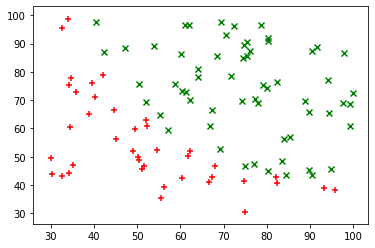

In [100]:
plot_data(X, y)

In [101]:
X_new, mean, std = normalize(X)

[65.64427405732314, 66.22199808811695]
[19.360686712476134, 18.48963567058878]


In [102]:
X_new = prepare_X(X_new)
y_new = y.values.reshape((X.shape[0], 1))

In [103]:
theta = np.array([[0,0,0]])

In [104]:
cost_function(X_new, y_new, theta.T)


0.6931471805599453

In [105]:
new_theta, Js = gradient_descent(X_new, y_new, theta.T, 0.01, 1e-7, 1000000, False)
print(new_theta, len(Js))

[[1.56245168]
 [3.66099854]
 [3.40417088]] 24696


In [106]:
cost_function(X_new, y_new, new_theta)

0.20423899985294564

[-1.83802631  1.76571557] [ 1.51771464 -2.35791155]


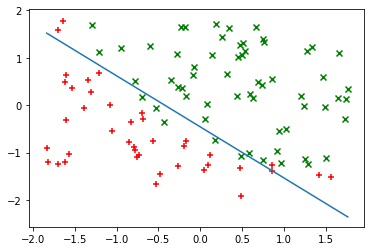

In [107]:
plot_data((X-mean)/std, y)
X_plot = prepare_X((X-mean)/std)
decision_boundary(X_plot, y, mean, std, new_theta)

In [108]:
T = np.array([[40, 40], [60, 65]])
print(predict(T, mean, std, new_theta))

[[1.]
 [1.]]


In [ ]:
# 